In [1]:
import pandas as pd

In [2]:
churn = pd.read_csv('mtn_customer_churn.csv')

In [3]:
churn

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,CUST0498,Shehu Harris,Jan-25,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,63000,8.14,No,NaN
970,CUST0499,Tega Hood,Mar-25,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,90000,154.13,No,NaN
971,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,525000,144.64,Yes,High Call Tarriffs
972,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,38500,158.49,Yes,High Call Tarriffs


### Change column names to snake_case

In [4]:
churn.columns = churn.columns.str.replace(' ', '_').str.lower()

In [5]:
print(churn.columns)

Index(['customer_id', 'full_name', 'date_of_purchase', 'age', 'state',
       'mtn_device', 'gender', 'satisfaction_rate', 'customer_review',
       'customer_tenure_in_months', 'subscription_plan', 'unit_price',
       'number_of_times_purchased', 'total_revenue', 'data_usage',
       'customer_churn_status', 'reasons_for_churn'],
      dtype='object')


In [6]:
print(churn.columns)

Index(['customer_id', 'full_name', 'date_of_purchase', 'age', 'state',
       'mtn_device', 'gender', 'satisfaction_rate', 'customer_review',
       'customer_tenure_in_months', 'subscription_plan', 'unit_price',
       'number_of_times_purchased', 'total_revenue', 'data_usage',
       'customer_churn_status', 'reasons_for_churn'],
      dtype='object')


# DATA CLEANING

### Check for null values

In [7]:
churn.isnull().sum()

customer_id                    0
full_name                      0
date_of_purchase               0
age                            0
state                          0
mtn_device                     0
gender                         0
satisfaction_rate              0
customer_review                0
customer_tenure_in_months      0
subscription_plan              0
unit_price                     0
number_of_times_purchased      0
total_revenue                  0
data_usage                     0
customer_churn_status          0
reasons_for_churn            690
dtype: int64

### We've got missing values in "reasons_for_churn" (690).
### Ignore ALL null values. The column will be removed during modelling.

## Check duplicated values

In [8]:
churn.duplicated().sum()

0

In [9]:
print(churn['customer_id'].unique())

['CUST0001' 'CUST0002' 'CUST0003' 'CUST0004' 'CUST0005' 'CUST0006'
 'CUST0007' 'CUST0008' 'CUST0009' 'CUST0010' 'CUST0011' 'CUST0012'
 'CUST0013' 'CUST0014' 'CUST0015' 'CUST0016' 'CUST0017' 'CUST0018'
 'CUST0019' 'CUST0020' 'CUST0021' 'CUST0022' 'CUST0023' 'CUST0024'
 'CUST0025' 'CUST0026' 'CUST0027' 'CUST0028' 'CUST0029' 'CUST0030'
 'CUST0031' 'CUST0032' 'CUST0033' 'CUST0034' 'CUST0035' 'CUST0036'
 'CUST0037' 'CUST0038' 'CUST0039' 'CUST0040' 'CUST0041' 'CUST0042'
 'CUST0043' 'CUST0044' 'CUST0045' 'CUST0046' 'CUST0047' 'CUST0048'
 'CUST0049' 'CUST0050' 'CUST0051' 'CUST0052' 'CUST0053' 'CUST0054'
 'CUST0055' 'CUST0056' 'CUST0057' 'CUST0058' 'CUST0059' 'CUST0060'
 'CUST0061' 'CUST0062' 'CUST0063' 'CUST0064' 'CUST0065' 'CUST0066'
 'CUST0067' 'CUST0068' 'CUST0069' 'CUST0070' 'CUST0071' 'CUST0072'
 'CUST0073' 'CUST0074' 'CUST0075' 'CUST0076' 'CUST0077' 'CUST0078'
 'CUST0079' 'CUST0080' 'CUST0081' 'CUST0082' 'CUST0083' 'CUST0084'
 'CUST0085' 'CUST0086' 'CUST0087' 'CUST0088' 'CUST0089' 'CUST0

In [10]:
print(churn['customer_id'].value_counts())

customer_id
CUST0250    3
CUST0249    3
CUST0219    3
CUST0227    3
CUST0228    3
           ..
CUST0303    1
CUST0305    1
CUST0306    1
CUST0307    1
CUST0001    1
Name: count, Length: 496, dtype: int64


In [11]:
print(churn['state'].unique())

['Kwara' 'Abuja (FCT)' 'Sokoto' 'Gombe' 'Oyo' 'Plateau' 'Jigawa' 'Imo'
 'Bauchi' 'Ondo' 'Kebbi' 'Adamawa' 'Yobe' 'Anambra' 'Cross River' 'Kogi'
 'Osun' 'Kano' 'Benue' 'Rivers' 'Enugu' 'Borno' 'Edo' 'Kaduna' 'Abia'
 'Ekiti' 'Bayelsa' 'Delta' 'Zamfara' 'Akwa Ibom' 'Nasarawa' 'Taraba'
 'Niger' 'Katsina' 'Lagos']


In [12]:
print(churn['state'].value_counts())

state
Osun           43
Abuja (FCT)    42
Borno          38
Bauchi         35
Abia           35
Kogi           34
Yobe           34
Ekiti          33
Edo            33
Oyo            33
Enugu          32
Cross River    31
Katsina        29
Kebbi          29
Imo            29
Anambra        29
Sokoto         29
Jigawa         28
Benue          28
Gombe          28
Zamfara        28
Plateau        27
Niger          26
Nasarawa       26
Taraba         24
Kano           23
Rivers         22
Akwa Ibom      22
Delta          21
Bayelsa        20
Adamawa        18
Kwara          17
Kaduna         17
Ondo           17
Lagos          14
Name: count, dtype: int64


In [13]:
print(churn['mtn_device'].unique())

['4G Router' 'Mobile SIM Card' '5G Broadband Router' 'Broadband MiFi']


In [14]:
print(churn['mtn_device'].value_counts())

mtn_device
Mobile SIM Card        301
5G Broadband Router    229
Broadband MiFi         228
4G Router              216
Name: count, dtype: int64


In [15]:
print(churn['satisfaction_rate'].unique())

[2 1 3 5 4]


In [16]:
print(churn['satisfaction_rate'].value_counts())

satisfaction_rate
4    212
2    199
3    199
1    198
5    166
Name: count, dtype: int64


In [17]:
print(churn['customer_review'].unique())

['Fair' 'Poor' 'Good' 'Excellent' 'Very Good']


In [18]:
print(churn['customer_review'].value_counts())

customer_review
Very Good    212
Fair         199
Good         199
Poor         198
Excellent    166
Name: count, dtype: int64


In [19]:
print(churn['customer_tenure_in_months'].unique())

[ 2 22 60 14 53  9 39 30 35  6  8 47 52 13 57 43 46 36 23 18  3 51 31  4
 50 32 59 21 49 38 28 56 10 20 11 42 45 34 27 12 48 17 54 58 44 33 25 24
 41 19 29  1 37 26  7 15 16  5 40 55]


In [20]:
print(churn['customer_tenure_in_months'].value_counts())

customer_tenure_in_months
22    26
51    26
2     25
56    25
18    23
53    22
49    22
16    22
34    21
25    21
7     20
35    20
6     20
8     20
24    20
44    20
60    20
58    20
43    19
26    19
30    19
23    18
48    18
14    18
45    18
42    18
11    18
36    18
12    17
20    17
28    17
9     17
39    16
46    16
21    15
59    15
50    15
29    15
57    15
38    14
47    14
19    14
3     13
13    12
37    12
41    12
55    12
31    12
32    12
54    11
17    11
27    11
33    11
52    10
40    10
10     8
4      7
5      7
1      6
15     4
Name: count, dtype: int64


In [21]:
print(churn['subscription_plan'].unique())

['165GB Monthly Plan' '12.5GB Monthly Plan' '150GB FUP Monthly Unlimited'
 '1GB+1.5mins Daily Plan' '30GB Monthly Broadband Plan'
 '10GB+10mins Monthly Plan' '25GB Monthly Plan' '7GB Monthly Plan'
 '1.5TB Yearly Broadband Plan' '65GB Monthly Plan'
 '120GB Monthly Broadband Plan' '300GB FUP Monthly Unlimited'
 '60GB Monthly Broadband Plan' '500MB Daily Plan' '3.2GB 2-Day Plan'
 '20GB Monthly Plan' '2.5GB 2-Day Plan' '450GB 3-Month Broadband Plan'
 '200GB Monthly Broadband Plan' '1.5GB 2-Day Plan'
 '16.5GB+10mins Monthly Plan']


In [22]:
print(churn['subscription_plan'].value_counts())

subscription_plan
60GB Monthly Broadband Plan     81
150GB FUP Monthly Unlimited     78
30GB Monthly Broadband Plan     77
165GB Monthly Plan              73
300GB FUP Monthly Unlimited     72
120GB Monthly Broadband Plan    68
10GB+10mins Monthly Plan        67
65GB Monthly Plan               63
25GB Monthly Plan               49
12.5GB Monthly Plan             38
3.2GB 2-Day Plan                35
200GB Monthly Broadband Plan    31
2.5GB 2-Day Plan                30
16.5GB+10mins Monthly Plan      30
500MB Daily Plan                29
1.5GB 2-Day Plan                29
7GB Monthly Plan                27
1.5TB Yearly Broadband Plan     25
450GB 3-Month Broadband Plan    25
1GB+1.5mins Daily Plan          24
20GB Monthly Plan               23
Name: count, dtype: int64


In [23]:
print(churn['number_of_times_purchased'].unique())

[19 12  8 15  9 16  5  2  6 11 17 10 20 18 13  1  3 14  4  7]


In [24]:
print(churn['number_of_times_purchased'].value_counts())

number_of_times_purchased
8     61
14    60
5     59
13    57
12    55
3     52
18    52
16    51
10    51
20    50
4     47
1     47
19    46
9     46
11    46
2     43
17    40
15    39
6     36
7     36
Name: count, dtype: int64


In [25]:
print(churn['customer_churn_status'].unique())

['Yes' 'No']


In [26]:
print(churn['customer_churn_status'].value_counts())

customer_churn_status
No     690
Yes    284
Name: count, dtype: int64


In [27]:
print(churn['reasons_for_churn'].unique())

['Relocation' 'Better Offers from Competitors' nan 'Poor Network'
 'Costly Data Plans' 'Fast Data Consumption' 'Poor Customer Service'
 'High Call Tarriffs']


In [28]:
print(churn['reasons_for_churn'].value_counts())

reasons_for_churn
High Call Tarriffs                54
Better Offers from Competitors    52
Poor Network                      45
Costly Data Plans                 40
Poor Customer Service             34
Fast Data Consumption             32
Relocation                        27
Name: count, dtype: int64


### Check Existing Data Types

In [29]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                974 non-null    object 
 1   full_name                  974 non-null    object 
 2   date_of_purchase           974 non-null    object 
 3   age                        974 non-null    int64  
 4   state                      974 non-null    object 
 5   mtn_device                 974 non-null    object 
 6   gender                     974 non-null    object 
 7   satisfaction_rate          974 non-null    int64  
 8   customer_review            974 non-null    object 
 9   customer_tenure_in_months  974 non-null    int64  
 10  subscription_plan          974 non-null    object 
 11  unit_price                 974 non-null    int64  
 12  number_of_times_purchased  974 non-null    int64  
 13  total_revenue              974 non-null    int64  

In [30]:
print(churn.columns)

Index(['customer_id', 'full_name', 'date_of_purchase', 'age', 'state',
       'mtn_device', 'gender', 'satisfaction_rate', 'customer_review',
       'customer_tenure_in_months', 'subscription_plan', 'unit_price',
       'number_of_times_purchased', 'total_revenue', 'data_usage',
       'customer_churn_status', 'reasons_for_churn'],
      dtype='object')


In [31]:
# Convert 'Abuja (FCT)' to 'Abuja'
churn['state'] = churn['state'].replace('Abuja (FCT)', 'Abuja')

In [32]:
# Verify the change
print(churn['state'].unique())

['Kwara' 'Abuja' 'Sokoto' 'Gombe' 'Oyo' 'Plateau' 'Jigawa' 'Imo' 'Bauchi'
 'Ondo' 'Kebbi' 'Adamawa' 'Yobe' 'Anambra' 'Cross River' 'Kogi' 'Osun'
 'Kano' 'Benue' 'Rivers' 'Enugu' 'Borno' 'Edo' 'Kaduna' 'Abia' 'Ekiti'
 'Bayelsa' 'Delta' 'Zamfara' 'Akwa Ibom' 'Nasarawa' 'Taraba' 'Niger'
 'Katsina' 'Lagos']


In [33]:
churn

,customer_id,full_name,date_of_purchase,age,state,mtn_device,gender,satisfaction_rate,customer_review,customer_tenure_in_months,subscription_plan,unit_price,number_of_times_purchased,total_revenue,data_usage,customer_churn_status,reasons_for_churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja,Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,CUST0498,Shehu Harris,Jan-25,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,63000,8.14,No,NaN
970,CUST0499,Tega Hood,Mar-25,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,90000,154.13,No,NaN
971,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,525000,144.64,Yes,High Call Tarriffs
972,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,38500,158.49,Yes,High Call Tarriffs


### Change Data Types

In [34]:
churn['customer_id'] = churn['customer_id'].astype('category')

In [35]:
churn['satisfaction_rate'] = churn['satisfaction_rate'].astype('category')

In [36]:
churn['unit_price'] = churn['unit_price'].astype('float')

In [37]:
churn['customer_churn_status'] = churn['customer_churn_status'].astype('category')

In [38]:
churn['state'] = churn['state'].astype('category')

In [39]:
churn['gender'] = churn['gender'].astype('category')

In [40]:
churn['subscription_plan'] = churn['subscription_plan'].astype('category')

In [41]:
churn['mtn_device'] = churn['mtn_device'].astype('category')

In [42]:
churn['date_of_purchase'] = pd.to_datetime(churn['date_of_purchase'], errors='coerce')

C:\Users\hp Elitebook\AppData\Local\Temp\ipykernel_11788\2123013400.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  churn['date_of_purchase'] = pd.to_datetime(churn['date_of_purchase'], errors='coerce')


In [43]:
churn['reasons_for_churn'] = churn['reasons_for_churn'].astype('category')

In [44]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customer_id                974 non-null    category      
 1   full_name                  974 non-null    object        
 2   date_of_purchase           0 non-null      datetime64[ns]
 3   age                        974 non-null    int64         
 4   state                      974 non-null    category      
 5   mtn_device                 974 non-null    category      
 6   gender                     974 non-null    category      
 7   satisfaction_rate          974 non-null    category      
 8   customer_review            974 non-null    object        
 9   customer_tenure_in_months  974 non-null    int64         
 10  subscription_plan          974 non-null    category      
 11  unit_price                 974 non-null    float64       
 12  number_o

# FEATURE ENGINEERING

### Drop Columns not necessary for Machine Learning

In [45]:
churn.drop(['full_name', 'customer_id', 'date_of_purchase', 'customer_review', 'reasons_for_churn', 'unit_price'], axis=1, inplace=True)

In [46]:
churn

,age,state,mtn_device,gender,satisfaction_rate,customer_tenure_in_months,subscription_plan,number_of_times_purchased,total_revenue,data_usage,customer_churn_status
0,27,Kwara,4G Router,Male,2,2,165GB Monthly Plan,19,665000,44.48,Yes
1,16,Abuja,Mobile SIM Card,Female,2,22,12.5GB Monthly Plan,12,66000,19.79,Yes
2,21,Sokoto,5G Broadband Router,Male,1,60,150GB FUP Monthly Unlimited,8,160000,9.64,No
3,21,Sokoto,Mobile SIM Card,Male,1,60,1GB+1.5mins Daily Plan,8,4000,197.05,No
4,21,Sokoto,Broadband MiFi,Male,1,60,30GB Monthly Broadband Plan,15,135000,76.34,No
...,...,...,...,...,...,...,...,...,...,...,...
969,72,Osun,4G Router,Female,3,42,25GB Monthly Plan,7,63000,8.14,No
970,41,Bayelsa,5G Broadband Router,Female,2,20,30GB Monthly Broadband Plan,10,90000,154.13,No
971,67,Kebbi,4G Router,Male,4,31,165GB Monthly Plan,15,525000,144.64,Yes
972,67,Kebbi,Mobile SIM Card,Male,4,31,7GB Monthly Plan,11,38500,158.49,Yes


# EXPLORATORY DATA ANALYTICS

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

### Customer Churn Status

In [48]:
print(churn['customer_churn_status'].dtype)

category


In [49]:
churn['customer_churn_status'].value_counts()

customer_churn_status
No     690
Yes    284
Name: count, dtype: int64

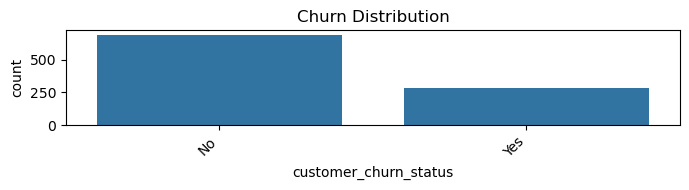

In [50]:
plt.figure(figsize=(7,2))
sns.countplot(x='customer_churn_status', data=churn)
plt.title('Churn Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Churn Distribution by State

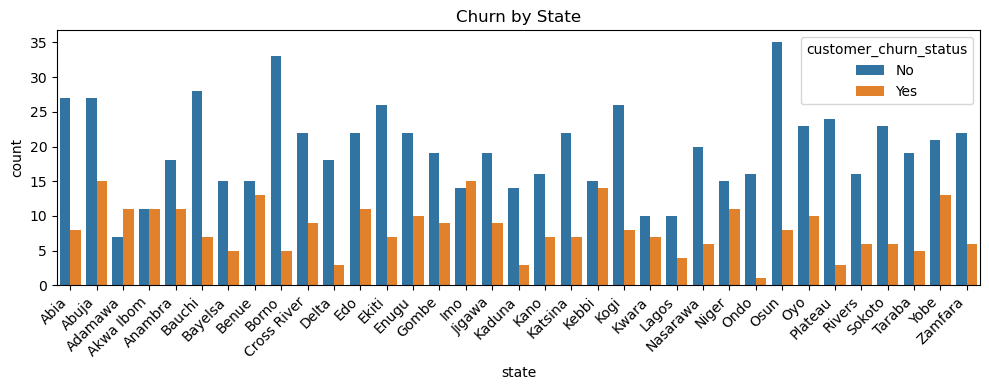

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(x='state', hue='customer_churn_status', data=churn)
plt.title('Churn by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

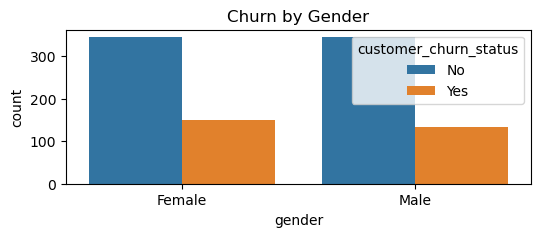

In [52]:
plt.figure(figsize=(6,2))
sns.countplot(x='gender', hue='customer_churn_status', data=churn)
plt.title('Churn by Gender')
plt.show()

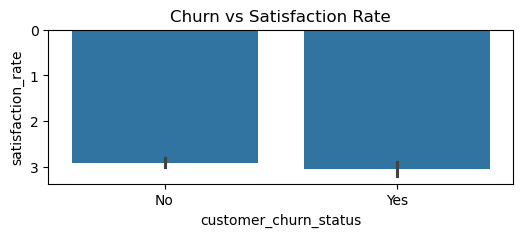

In [53]:
plt.figure(figsize=(6,2))
sns.barplot(x='customer_churn_status', y='satisfaction_rate', data=churn)
plt.title('Churn vs Satisfaction Rate')
plt.show()

### To check correlations

In [54]:
churn_num = churn.select_dtypes(include=['int64', 'float64'])
churn_num['churn'] = churn['customer_churn_status'].map({'No':0, 'Yes':1})
churn_num.corr()['churn'].sort_values()

age                         -0.048252
number_of_times_purchased   -0.031024
total_revenue               -0.000877
data_usage                   0.036566
customer_tenure_in_months    0.063352
churn                        1.000000
Name: churn, dtype: float64

### Low correlations overall. Top factors: customer_tenure_in_months: +0.06 (slight churn ↑ with more tenure?) - data_usage: +0.04 (churn ↑ with more data usage)

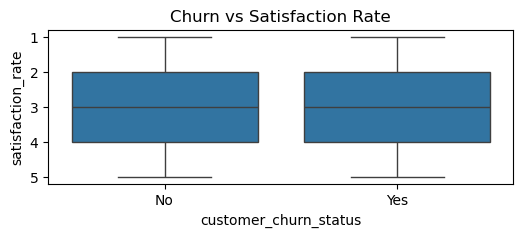

In [55]:
plt.figure(figsize=(6,2))
sns.boxplot(x='customer_churn_status', y='satisfaction_rate', data=churn)
plt.title('Churn vs Satisfaction Rate')
plt.show()

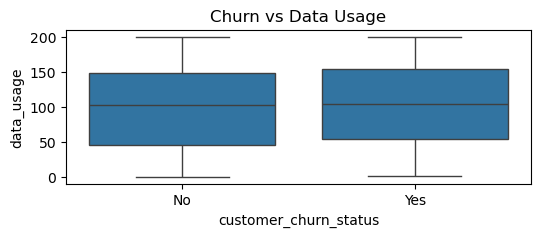

In [56]:
plt.figure(figsize=(6,2))
sns.boxplot(x='customer_churn_status', y='data_usage', data=churn)
plt.title('Churn vs Data Usage')
plt.show()

# MACHINE ENCODING

### One-Hot Encoding for Nominal Categories

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
cat_cols = ['state', 'mtn_device', 'gender', 'subscription_plan']
# 1. Initialize the encoder (drop='first' mimics your get_dummies setting)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# 2. Fit and transform the categorical columns
encoded_array = encoder.fit_transform(X_train[cat_cols])

Combine with Numeric columns to get a 100% NUMERIC DataFrame
# 3. (Replace num_cols with your actual numeric column names like 'age', 'tenure', etc.)
X_train_numeric = pd.concat([
    X_train[num_cols].reset_index(drop=True), 
    encoded_df.reset_index(drop=True)
], axis=1)


SyntaxError: invalid syntax (1590043083.py, line 8)

### Binary Encoding for the Target Variable.  Convert 'Yes'/'No' in 'customer_churn_status' to 1/0

In [59]:
churn['customer_churn_status'] = churn['customer_churn_status'].map({'Yes': 1, 'No': 0})

### Check the new structure

In [60]:
print("New DataFrame shape:", churn.shape)
print(churn.head())

New DataFrame shape: (974, 11)
   age   state           mtn_device  gender satisfaction_rate  \
0   27   Kwara            4G Router    Male                 2   
1   16   Abuja      Mobile SIM Card  Female                 2   
2   21  Sokoto  5G Broadband Router    Male                 1   
3   21  Sokoto      Mobile SIM Card    Male                 1   
4   21  Sokoto       Broadband MiFi    Male                 1   

   customer_tenure_in_months            subscription_plan  \
0                          2           165GB Monthly Plan   
1                         22          12.5GB Monthly Plan   
2                         60  150GB FUP Monthly Unlimited   
3                         60       1GB+1.5mins Daily Plan   
4                         60  30GB Monthly Broadband Plan   

   number_of_times_purchased  total_revenue  data_usage customer_churn_status  
0                         19         665000       44.48                     1  
1                         12          66000       1

In [61]:
churn

,age,state,mtn_device,gender,satisfaction_rate,customer_tenure_in_months,subscription_plan,number_of_times_purchased,total_revenue,data_usage,customer_churn_status
0,27,Kwara,4G Router,Male,2,2,165GB Monthly Plan,19,665000,44.48,1
1,16,Abuja,Mobile SIM Card,Female,2,22,12.5GB Monthly Plan,12,66000,19.79,1
2,21,Sokoto,5G Broadband Router,Male,1,60,150GB FUP Monthly Unlimited,8,160000,9.64,0
3,21,Sokoto,Mobile SIM Card,Male,1,60,1GB+1.5mins Daily Plan,8,4000,197.05,0
4,21,Sokoto,Broadband MiFi,Male,1,60,30GB Monthly Broadband Plan,15,135000,76.34,0
...,...,...,...,...,...,...,...,...,...,...,...
969,72,Osun,4G Router,Female,3,42,25GB Monthly Plan,7,63000,8.14,0
970,41,Bayelsa,5G Broadband Router,Female,2,20,30GB Monthly Broadband Plan,10,90000,154.13,0
971,67,Kebbi,4G Router,Male,4,31,165GB Monthly Plan,15,525000,144.64,1
972,67,Kebbi,Mobile SIM Card,Male,4,31,7GB Monthly Plan,11,38500,158.49,1


# DATA SPLITTING & SCALING

### Split the data into train & test data
### 1. Import train_test_split
### 2. Define your X & y features

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = churn.drop('customer_churn_status', axis=1)
y = churn['customer_churn_status']

### Split the dataset
### * Split the data FIRST (to prevent data leakage during scaling)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Scaling
### * List of numericals that need scaling

In [65]:
num_cols = [
    'age', 'satisfaction_rate', 'customer_tenure_in_months', 'number_of_times_purchased', 'total_revenue', 'data_usage'
]

### Scale the numerical features
### * First import StandardScaler

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

### * Fit only on training data to prevent leakage

In [68]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# BALANCING THE DATASET

### * Chech for imbalance at the label (customer_churn_status)

In [69]:
print(churn['customer_churn_status'].value_counts())

customer_churn_status
0    690
1    284
Name: count, dtype: int64


### There is imbalance (690 against 284). So we balance it.
### * We balance using the SMOTE technique
### * We first import the necessary libraries

In [70]:
from imblearn.over_sampling import SMOTE
from collections import Counter

### * BALANCING - Use SMOTE on the training set ONLY

In [71]:
smote = SMOTE(random_state=42)

In [72]:
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'Abuja'

# MODELS AND EVALUATION

In [ ]:
from sklearn.metrics import classification_report

# RANDOM FOREST 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', max_depth=10, random_state=42)
rf.fit(X_train_bal, y_train_bal)

### Evaluation (Random Forest)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
rf_pred

In [ ]:
print(classification_report(y_test, rf_pred))

### That Recall of 0.25 for Class 1 means your model is currently "blind" to 75% of your churners. It is playing it way too safe—only flagging someone as "Churn" when it is absolutely certain, which usually happens because the majority class (non-churners) is still dominating the learning process.


### Ajusting the probability threshold

In [ ]:
rf_probs = rf.predict_proba(X_test)[:, 1]

In [ ]:
rf_pred_adj = (rf_probs >= 0.35).astype(int)

In [ ]:
print(classification_report(y_test, rf_pred_adj))

### Whoa, we just flipped the script! You went from a 25% recall to an 84% recall for churners (Class 1).
### 
What happened?### 
By lowering the threshold, you turned your model into a "Hyper-Sensitive Churn Detector.### "
The Good News: You are now catching 84% of people who are actually leaving MTN. You've successfully identified 48 out of those 57 churner### s.
The Bad News: Your Precision (0.31) is now very low. This means for every 10 people the model flags as "leaving," only 3 actually are. You are currently crying wolf on 77% of your loyal customers (Class 0 recall is only 22### %).
The "Sweet Spot" Stra### tegy
Your accuracy dropped to 40% because the threshold (0.35) was likely too aggressive for this specific Random Forest. We need to find the balance where you catch enough churners without insulting all your loyal customers. 


### Ajusting the probability threshold from 0.35 to 0.45

In [ ]:
rf_probs_1 = rf.predict_proba(X_test)[:, 1]

In [ ]:
rf_pred_adj_1 = (rf_probs_1 >= 0.45).astype(int)

In [ ]:
print(classification_report(y_test, rf_pred_adj_1))

### This 0.45 threshold is your "Sweet Spot." We’ve successfully moved from a model that was blind to churners (25% recall) to one that catches 58% of them, while keeping our overall accuracy at a respectable 66%.
### 
What the numbers mean for MTN:### 
Recall (0.58): You are catching more than half of the customers about to leave. This is a massive improvement over the initial 25%### .
Precision (0.43): When the model flags a churner, it's right nearly half the time. This is high enough to justify sending targeted retention offers (like data bonuses) without wasting too much budget on loyal customer### s.
F1-Score (0.50): This has climbed from 0.35, showing the model is much more balanced and "healthier" overall.


# XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=2.4, # Helps catch the 57 churners
    random_state=42
)

In [ ]:
xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
y_pred_xgb

In [ ]:
print("--- New System (XGBoost) Performance ---")
print(classification_report(y_test, y_pred_xgb))

### Interpretation (with balanced dataset):
"""
- Class 0 (not churn): Good precision (83%) but recall (65%) suggests some non-churners are being misclassified.
- Class 1 (churn): Low precision (44%) means many predicted churners aren't actually churning. Recall (67%) is okay, catching most churners.
- Accuracy: 66% is okay, but not great.
"""

### Interpretation (without balanced dataset):
"""
- Class 0 (not churn):
   - Precision (80%) & Recall (78%) are decent - model is doing okay predicting non-churners.
- Class 1 (churn):
   - Precision (50%) is low, Recall (54%) is so-so. Model struggles predicting churners.
- Overall Accuracy: 71% ain't bad, but churn class needs love.

MTN Context: Focus on improving Class 1 (churn) metrics - false negatives (missed churners) might hurt retention efforts.
"""

### Hyperparameter Tuning of the XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.3]
}

In [ ]:
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5, scoring='f1')

In [ ]:
grid_search.fit(X_train_bal, y_train_bal)

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
xgb_tuned = xgb.XGBClassifier(gamma=0, learning_rate=0.1, max_depth=7, n_estimators=200)

In [ ]:
xgb_tuned.fit(X_train_bal, y_train_bal)

In [ ]:
xgb_pred_tuned = xgb_tuned.predict(X_test)

In [ ]:
xgb_pred_tuned

In [ ]:
print("--- New System (XGBoost) Tuned Performance ---")
print(classification_report(y_test, xgb_pred_tuned))

### INTERPRETATION OF XGBOOST RESULT AFTER TUNING
"""
- Class 0 (not churn): Strong performance (F1=0.85)
- Class 1 (churn): Precision (66%) is okay, but Recall (47%) dropped vs earlier (67%). F1=0.55.
- Accuracy: 77% - improved vs earlier (66%).

Trade-off: Model's more precise on churn (66%) but catching fewer churners (47% Recall).
For MTN, is catching churners (Recall) or reducing false positives (Precision) more important?
"""

# FINAL COMPARISON OF RESULTS BETWEEN RANDOM FOREST (Tuned) and XGBOST (Tuned).

"""
- Random Forest (tuned):
    - Class 1 (churn): Precision=43%, Recall=58%, F1=0.50
    - Accuracy=66%
      
...
- XGBoost (tuned):
    - Class 1 (churn): Precision=66% (+23%), Recall=47% (-11%), F1=0.55
    - Accuracy=77% (+11%)

***
### * Verdict: XGBoost (tuned) has better precision for churn (+23%) and overall accuracy (+11%). Random Forest had better recall for churn (58% vs 47%).

# For MTN churn prediction, XGBoost (tuned) looks better overall
"""

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### # Data from the comparison table

In [ ]:
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
rf_scores = [0.43, 0.58, 0.50, 0.66]
xg_scores = [0.66, 0.47, 0.55, 0.77]

In [ ]:
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
rects2 = ax.bar(x + width/2, xg_scores, width, label='XGBoost (Tuned)', color='black')

In [ ]:
# Add text for labels, title and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

In [ ]:
# Add percentage labels on top of bars
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

In [ ]:
fig.tight_layout()

In [ ]:
plt.show()

## Interactive Radar Chart

In [ ]:
import plotly.graph_objects as go

In [ ]:
categories = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

In [ ]:
fig = go.Figure()

In [ ]:
# Add Random Forest trace
fig.add_trace(go.Scatterpolar(
      r=[0.43, 0.58, 0.50, 0.66, 0.43], # Repeat first to close circle
      theta=categories + [categories[0]],
      fill='toself',
      name='Random Forest (Tuned)'
))

In [ ]:
# Add XGBoost trace
fig.add_trace(go.Scatterpolar(
      r=[0.66, 0.47, 0.55, 0.77, 0.66],
      theta=categories + [categories[0]],
      fill='toself',
      name='XGBoost (Tuned)'
))

In [ ]:
fig.update_layout(
  polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
  showlegend=True,
  title="Model Metric Profile Comparison"
)

In [ ]:
fig.show()

In [ ]:
import joblib

joblib.dump(grid_search, 'xgboost_tuned.joblib')

In [ ]:
joblib.dump(encoder, "encoder.joblib")